In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("CONTAINER.xls")
df.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,OWNER_ID,CONTAINER_CODE,CONTAINER_TYPE,NAME,SHELL_FULL_CAPACITY,TARE_WEIGHT,MAX_WEIGHT
0,0,TK-100,1,ADD GO AFR,0,0,0
1,0,TK-101,1,GASOIL,0,0,0
2,0,TK-102,1,GASOIL,0,0,0
3,0,TK-103,1,GASOIL,0,0,0
4,0,TK-104,1,GASOIL,0,0,0


In [ ]:
df.dropna(axis=1, how='all', inplace=True)

In [ ]:
df_cleaned=df.dropna()
df_cleaned

,OWNER_ID,CONTAINER_CODE,CONTAINER_TYPE,NAME,SHELL_FULL_CAPACITY,TARE_WEIGHT,MAX_WEIGHT
0,0,TK-100,1,ADD GO AFR,0,0,0
1,0,TK-101,1,GASOIL,0,0,0
2,0,TK-102,1,GASOIL,0,0,0
3,0,TK-103,1,GASOIL,0,0,0
4,0,TK-104,1,GASOIL,0,0,0
5,0,TK-105,1,MOGAS,0,0,0
6,0,TK-106,1,MOGAS,0,0,0
7,0,TK-200,1,ADD MOG AFR,0,0,0
8,0,TK-201,1,MOGAS,0,0,0
9,0,TK-202,1,MOGAS,0,0,0


In [ ]:
import altair as alt

# Assuming df is your DataFrame containing 'NAME' and 'CONTAINER_CODE' columns

# Define a selection for x-axis
x_select = alt.selection_single(
    fields=['NAME'],
    bind=alt.binding_select(options=list(df_cleaned['NAME'].unique())),
    name='Select X-axis'
)

# Define a selection for y-axis
y_select = alt.selection_single(
    fields=['CONTAINER_CODE'],
    bind=alt.binding_select(options=list(df_cleaned['CONTAINER_CODE'].unique())),
    name='Select Y-axis'
)

# Create the base chart
base_chart = alt.Chart(df_cleaned).mark_point().encode(
    x=alt.X('NAME', title='PRODUCT'),
    y=alt.Y('CONTAINER_CODE', title='CONTAINER_CODE'),
    color='NAME',
    tooltip=['NAME', 'CONTAINER_CODE']
).transform_filter(
    alt.datum.NAME != None  # Filter out null values in 'NAME'
)

# Apply selections
interactive_chart = base_chart.add_selection(x_select, y_select).transform_filter(
    x_select
).transform_filter(
    y_select
)

# Show the chart
interactive_chart


alt.Chart(...)

In [ ]:
df1 = df_cleaned.drop(['SHELL_FULL_CAPACITY', 'TARE_WEIGHT', 'MAX_WEIGHT','OWNER_ID'], axis=1)


In [ ]:
df1

,CONTAINER_CODE,CONTAINER_TYPE,NAME
0,TK-100,1,ADD GO AFR
1,TK-101,1,GASOIL
2,TK-102,1,GASOIL
3,TK-103,1,GASOIL
4,TK-104,1,GASOIL
5,TK-105,1,MOGAS
6,TK-106,1,MOGAS
7,TK-200,1,ADD MOG AFR
8,TK-201,1,MOGAS
9,TK-202,1,MOGAS


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['CONTAINER_TYPE']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'CONTAINER_TYPE'}, axis=1)
              .sort_values('CONTAINER_TYPE', ascending=True))
  xs = counted['CONTAINER_TYPE']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df1.sort_values('CONTAINER_TYPE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CONTAINER_TYPE')
_ = plt.ylabel('count()')

In [ ]:
# prompt: Avec le DataFrame df1: container_code vs name

import altair as alt
chart = alt.Chart(df1).mark_bar().encode(x='CONTAINER_CODE', y='NAME', color='NAME')
chart


alt.Chart(...)

In [ ]:
excel_file_path = 'container.xlsx'
df1.to_excel(excel_file_path, index=False)

In [ ]:
!pip install dtale

In [ ]:
import dtale

dtale.show(df)
df

,OWNER_ID,CONTAINER_CODE,CONTAINER_TYPE,NAME,SHELL_FULL_CAPACITY,TARE_WEIGHT,MAX_WEIGHT
0,0,TK-100,1,ADD GO AFR,0,0,0
1,0,TK-101,1,GASOIL,0,0,0
2,0,TK-102,1,GASOIL,0,0,0
3,0,TK-103,1,GASOIL,0,0,0
4,0,TK-104,1,GASOIL,0,0,0
...,...,...,...,...,...,...,...
757,2,988-010,2,NaN,0,0,0
758,2,989-010,2,NaN,0,0,0
759,2,990-010,2,NaN,0,0,0
760,2,991-010,2,NaN,0,0,0


AttributeError: 'function' object has no attribute 'dropna'

In [ ]:
df1 = pd.read_excel("COMPARTMENT_STRAPPING1.xls")
df1.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,OWNER_ID,CONTAINER_CODE,QUANTITY,CONTAINER_TYPE,COMPARTMENT_NUMBER,STRAP_TYPE,INT_LEVEL
0,0,TK-101,0,1,1,1,0
1,0,TK-101,254254,1,1,1,100
2,0,TK-101,255843,1,1,1,200
3,0,TK-101,257431,1,1,1,300
4,0,TK-101,259020,1,1,1,400


from matplotlib import pyplot as plt
_df_0['QUANTITY'].plot(kind='hist', bins=20, title='QUANTITY')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['INT_LEVEL'].plot(kind='hist', bins=20, title='INT_LEVEL')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='QUANTITY', y='INT_LEVEL', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['OWNER_ID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'OWNER_ID'}, axis=1)
              .sort_values('OWNER_ID', ascending=True))
  xs = counted['OWNER_ID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('OWNER_ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('OWNER_ID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['QUANTITY']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'QUANTITY'}, axis=1)
              .sort_values('QUANTITY', ascending=True))
  xs = counted['QUANTITY']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('QUANTITY', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('QUANTITY')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['CONTAINER_TYPE']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'CONTAINER_TYPE'}, axis=1)
              .sort_values('CONTAINER_TYPE', ascending=True))
  xs = counted['CONTAINER_TYPE']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('CONTAINER_TYPE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CONTAINER_TYPE')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['COMPARTMENT_NUMBER']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'COMPARTMENT_NUMBER'}, axis=1)
              .sort_values('COMPARTMENT_NUMBER', ascending=True))
  xs = counted['COMPARTMENT_NUMBER']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('COMPARTMENT_NUMBER', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('COMPARTMENT_NUMBER')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['QUANTITY'].plot(kind='line', figsize=(8, 4), title='QUANTITY')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['INT_LEVEL'].plot(kind='line', figsize=(8, 4), title='INT_LEVEL')
plt.gca().spines[['top', 'right']].set_visible(False)

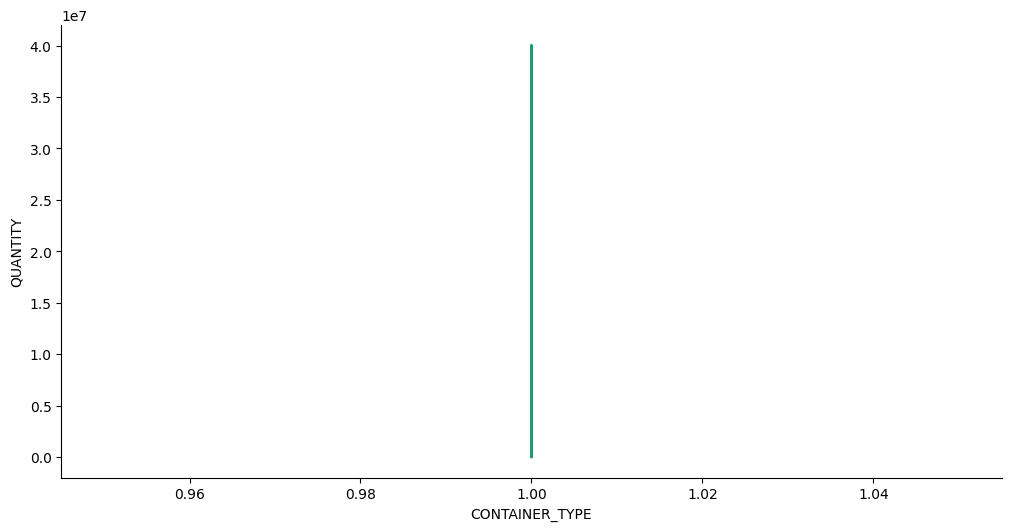

In [ ]:
# @title CONTAINER_TYPE vs QUANTITY

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CONTAINER_TYPE']
  ys = series['QUANTITY']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df1.sort_values('CONTAINER_TYPE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CONTAINER_TYPE')
_ = plt.ylabel('QUANTITY')

<Axes: xlabel='INT_LEVEL'>

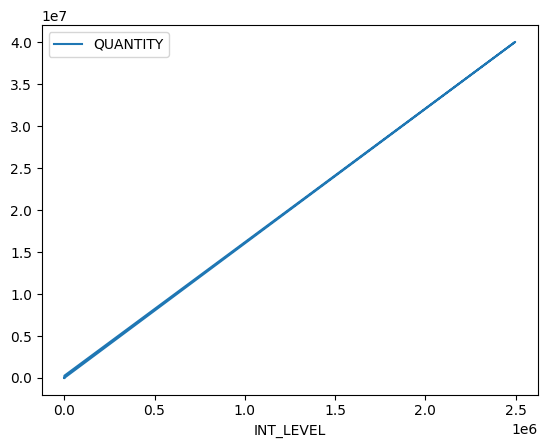

In [ ]:
# prompt: Avec le DataFrame df1: QUANTITY in a chart

df1.plot.line(x='INT_LEVEL', y='QUANTITY')


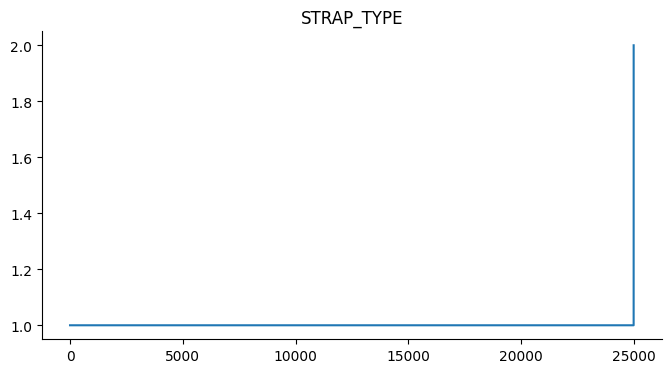

In [ ]:
# @title STRAP_TYPE

from matplotlib import pyplot as plt
df1['STRAP_TYPE'].plot(kind='line', figsize=(8, 4), title='STRAP_TYPE')
plt.gca().spines[['top', 'right']].set_visible(False)

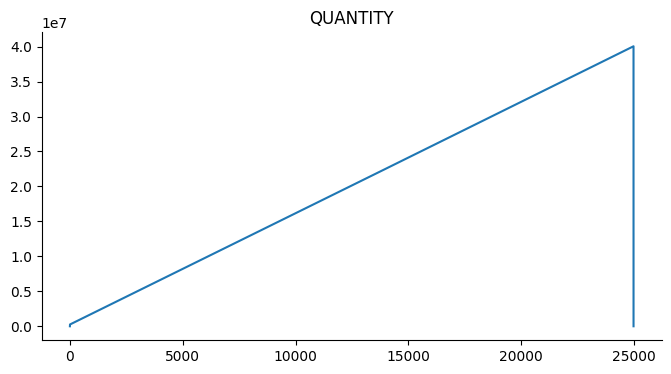

In [ ]:
# @title QUANTITY

from matplotlib import pyplot as plt
df1['QUANTITY'].plot(kind='line', figsize=(8, 4), title='QUANTITY')
plt.gca().spines[['top', 'right']].set_visible(False)